In [51]:
import os
from googleapiclient.discovery import build
from dotenv import load_dotenv
import pandas as pd
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [52]:
# Load environment variables
load_dotenv()

API_KEY = os.getenv('YOUTUBE_API_KEY')
youtube = build('youtube', 'v3', developerKey=API_KEY)

def get_channel_statistics(channel_ids):
    stats = []
    for channel_id in channel_ids:
        request = youtube.channels().list(
            part='snippet,contentDetails,statistics',
            id=channel_id
        )
        response = request.execute()
        stats.append(response['items'][0])
    return stats

def search_channels(query, max_results=10):
    request = youtube.search().list(
        q=query,
        type='channel',
        part='snippet',
        maxResults=max_results
    )
    response = request.execute()
    return response['items']

# Step 1: Search for channels related to Kenya
channels = search_channels('Kenya')
channel_ids = [channel['id']['channelId'] for channel in channels]

# Step 2: Get statistics for these channels
channel_stats = get_channel_statistics(channel_ids)

# Step 3: Convert to DataFrame for analysis
df = pd.DataFrame([{
    'channelId': stat['id'],
    'title': stat['snippet']['title'],
    'subscriberCount': int(stat['statistics'].get('subscriberCount', 0)),
    'viewCount': int(stat['statistics'].get('viewCount', 0)),
    'videoCount': int(stat['statistics'].get('videoCount', 0))
} for stat in channel_stats])

# Step 4: Calculate ranks
df['subscriberRank'] = df['subscriberCount'].rank(ascending=False)
df['viewRank'] = df['viewCount'].rank(ascending=False)
df['videoRank'] = df['videoCount'].rank(ascending=False)

# Step 5: Calculate averages
average_subscribers = df['subscriberCount'].mean()
average_views = df['viewCount'].mean()
average_videos = df['videoCount'].mean()

# Step 6: Identify the most-watched channel
most_watched_channel = df[df['viewCount'] == df['viewCount'].max()]

# Step 7: Answering key questions
print("1. Which channels are in the top rank based on subscribers?")
print(df.sort_values('subscriberRank').head(5))

print("\n2. Which channels are in the top rank based on views?")
print(df.sort_values('viewRank').head(5))

print("\n3. Which channels have the most videos?")
print(df.sort_values('videoRank').head(5))

print("\n4. What is the average number of subscribers across these channels?")
print(f"Average Subscribers: {average_subscribers}")

print("\n5. What is the average number of views across these channels?")
print(f"Average Views: {average_views}")

print("\n6. What is the average number of videos across these channels?")
print(f"Average Videos: {average_videos}")

print("\n7. Which channel is the most watched?")
print(most_watched_channel[['title', 'viewCount']])

# Save the DataFrame to CSV for further analysis
df.to_csv('kenya_channels.csv', index=False)

1. Which channels are in the top rank based on subscribers?
                  channelId  \
7  UC-ugP6AcvKwiO8gs5BnEXkA   
1  UCXuseB7juWB7DIgTJcwtHFQ   
9  UCByj0XrDmb0UDUui63EOnhA   
2  UCBXe79nnuPRYci4acLafjHA   
6  UCn0gL0gaCE9Moxe0UFIruzw   

                                               title  subscriberCount  \
7                                 Hope Channel Kenya            97200   
1                                Parliament of Kenya            68200   
9                                       Edu TV Kenya            37400   
2                                 Auto Konnekt Kenya            32600   
6  Betty's Stories From Kenya(Истории Бетти из Ке...            27100   

   viewCount  videoCount  subscriberRank  viewRank  videoRank  
7    8345558        3853             1.0       1.0        1.0  
1    7174589        1790             2.0       2.0        2.0  
9    2597288        1050             3.0       4.0        3.0  
2    1140596          39             4.0       6.0        

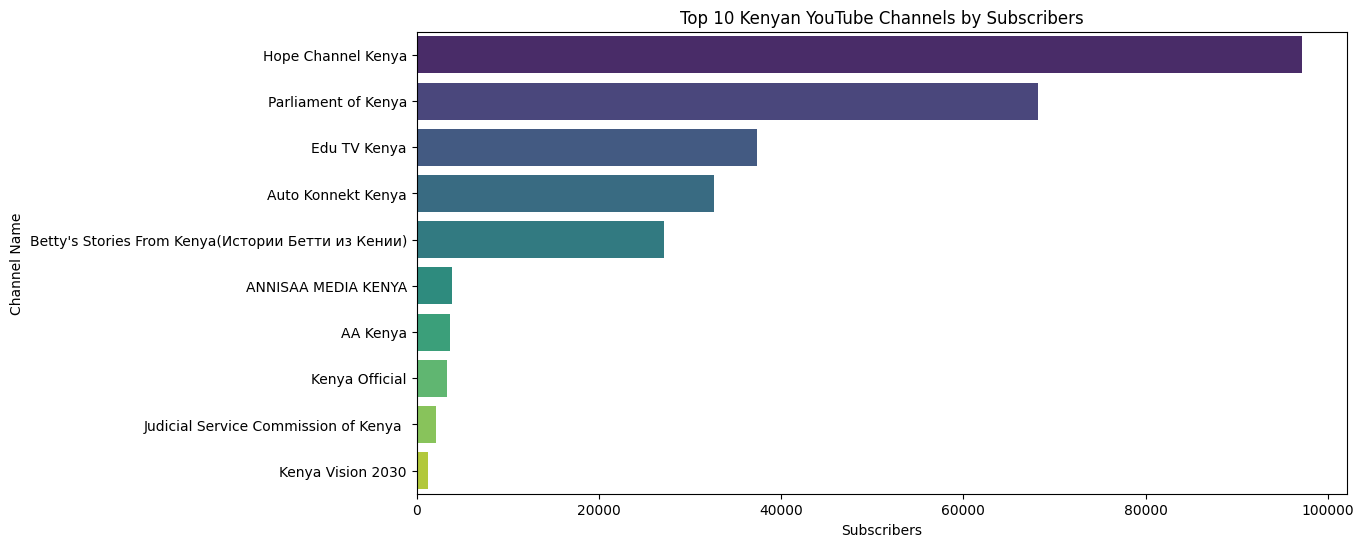

In [53]:
# Sorting by subscriber count
top_subscribers = df.sort_values('subscriberCount', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='subscriberCount', y='title', data=top_subscribers, palette='viridis')
plt.title('Top 10 Kenyan YouTube Channels by Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Channel Name')
plt.show()

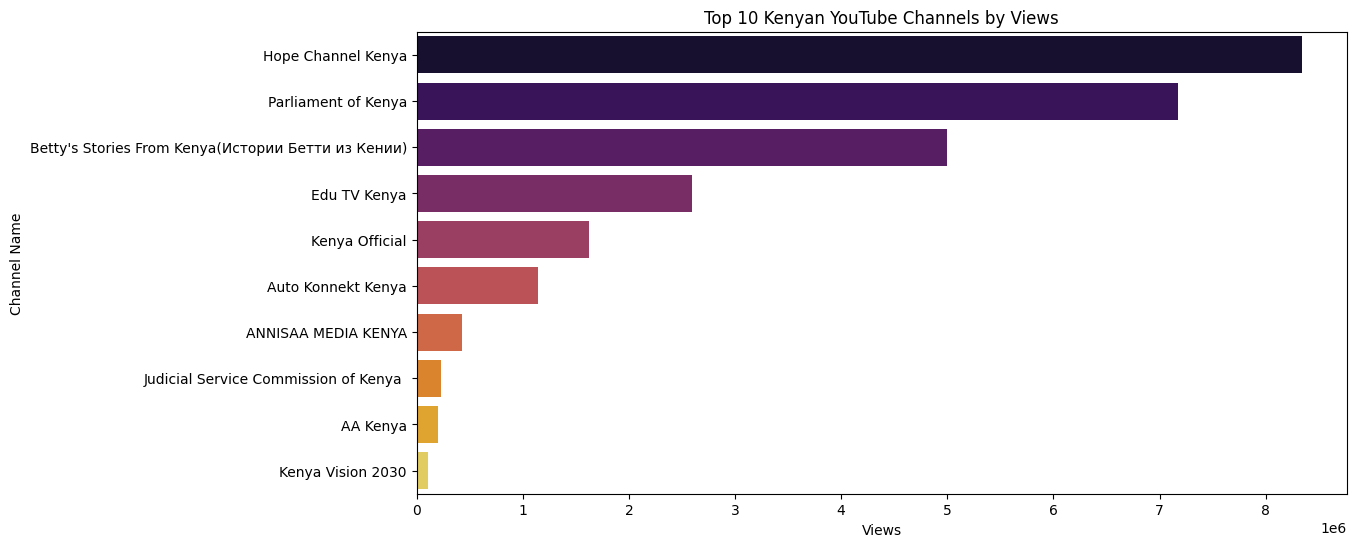

In [54]:
# Sorting by view count
top_views = df.sort_values('viewCount', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='viewCount', y='title', data=top_views, palette='inferno')
plt.title('Top 10 Kenyan YouTube Channels by Views')
plt.xlabel('Views')
plt.ylabel('Channel Name')
plt.show()

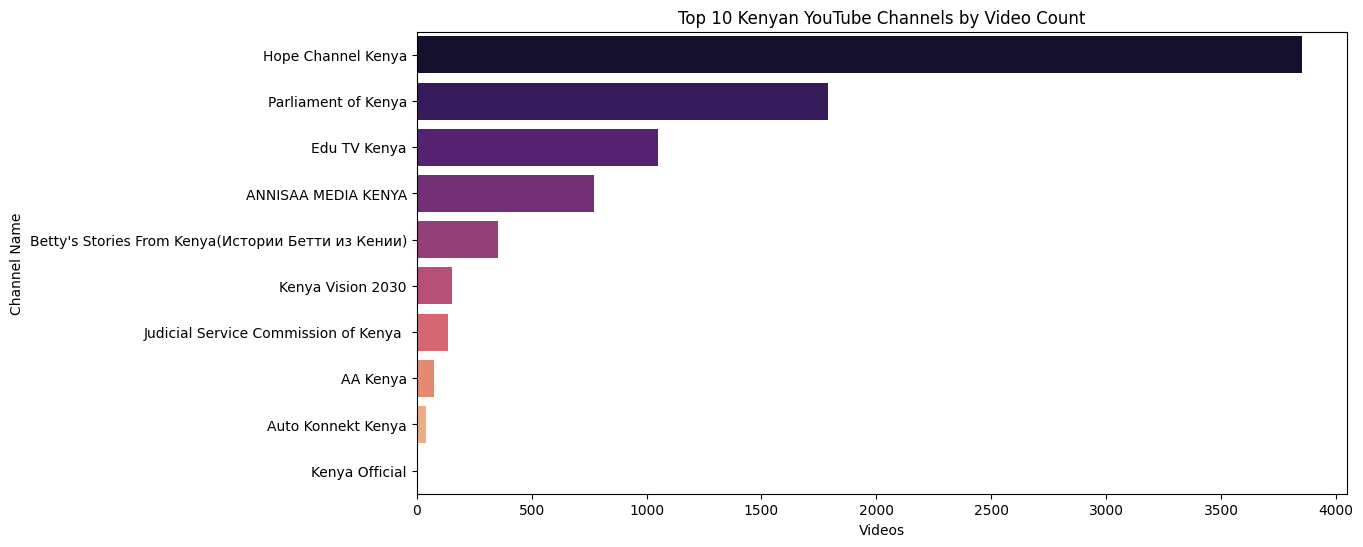

In [55]:
# Sorting by video count
top_videos = df.sort_values('videoCount', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='videoCount', y='title', data=top_videos, palette='magma')
plt.title('Top 10 Kenyan YouTube Channels by Video Count')
plt.xlabel('Videos')
plt.ylabel('Channel Name')
plt.show()

In [56]:
# Assuming you have N data points
N = len(df)
df['date'] = pd.date_range(start='2023-01-01', periods=N, freq='D')  # Example date range

In [57]:
# Check if 'date' is in the index
print(df.index.names)


[None]


In [58]:
# Drop 'date' from the columns if it should only be in the index
df = df.drop(columns=['date'])

In [59]:
print(df.index.names)

[None]


In [60]:
# Reset the index to move 'date' back to a column
df = df.reset_index()


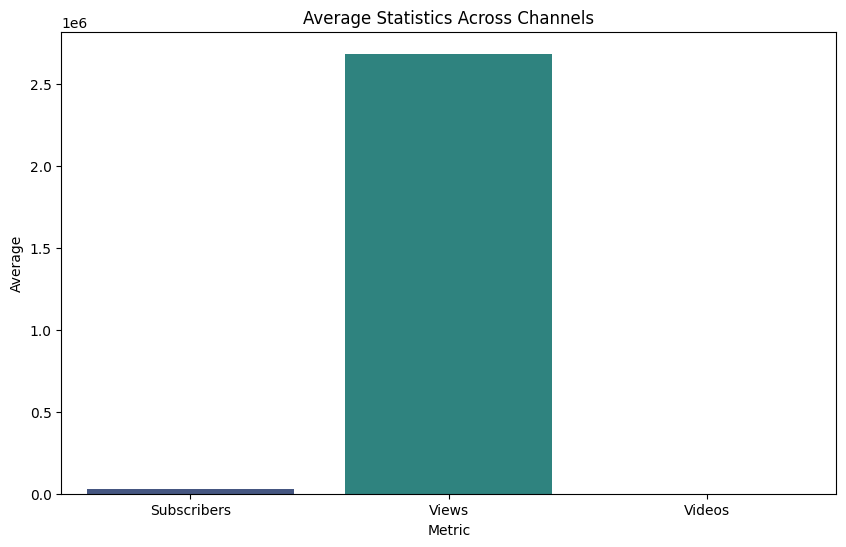

In [65]:
avg_subscribers = df['subscriberCount'].mean()
avg_views = df['viewCount'].mean()
avg_videos = df['videoCount'].mean()

avg_data = pd.DataFrame({
    'Metric': ['Subscribers', 'Views', 'Videos'],
    'Average': [avg_subscribers, avg_views, avg_videos]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Average', data=avg_data, palette='viridis')
plt.title('Average Statistics Across Channels')
plt.xlabel('Metric')
plt.ylabel('Average')
plt.show()


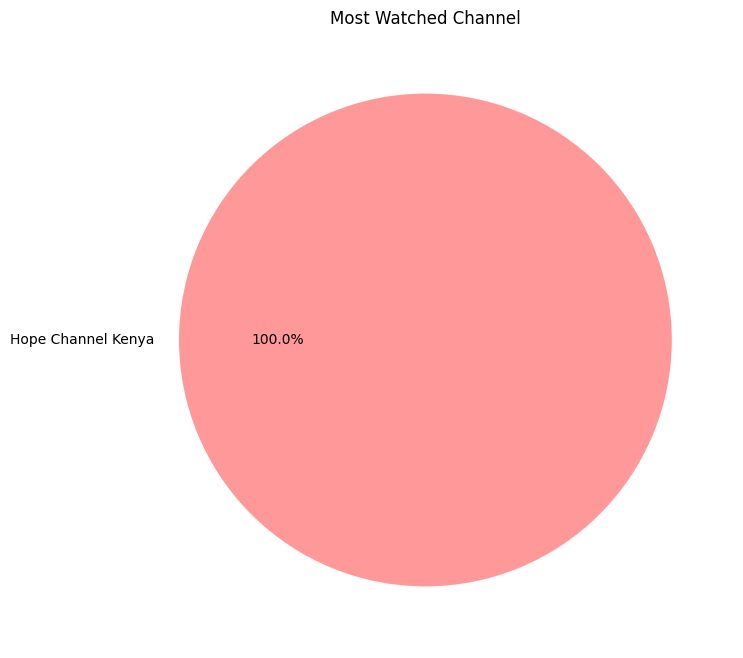

In [66]:
most_watched_channel = df.loc[df['viewCount'].idxmax()]

plt.figure(figsize=(8, 8))
plt.pie([most_watched_channel['viewCount']], labels=[most_watched_channel['title']], autopct='%1.1f%%', colors=['#ff9999'])
plt.title('Most Watched Channel')
plt.show()


In [67]:
# Inspect the data
df.head()


,index,channelId,title,subscriberCount,viewCount,videoCount,subscriberRank,viewRank,videoRank
0,0,UCLEbibgwOY787d16dXshmbg,Judicial Service Commission of Kenya,2150,225569,138,9.0,8.0,7.0
1,1,UCXuseB7juWB7DIgTJcwtHFQ,Parliament of Kenya,68200,7174589,1790,2.0,2.0,2.0
2,2,UCBXe79nnuPRYci4acLafjHA,Auto Konnekt Kenya,32600,1140596,39,4.0,6.0,9.0
3,3,UCItYlCUeVwwCoEvJb6Juj9w,Kenya Official,3350,1625294,8,8.0,5.0,10.0
4,4,UCulxPgZoPJXgmXVTam9suPg,AA Kenya,3710,198445,74,7.0,9.0,8.0


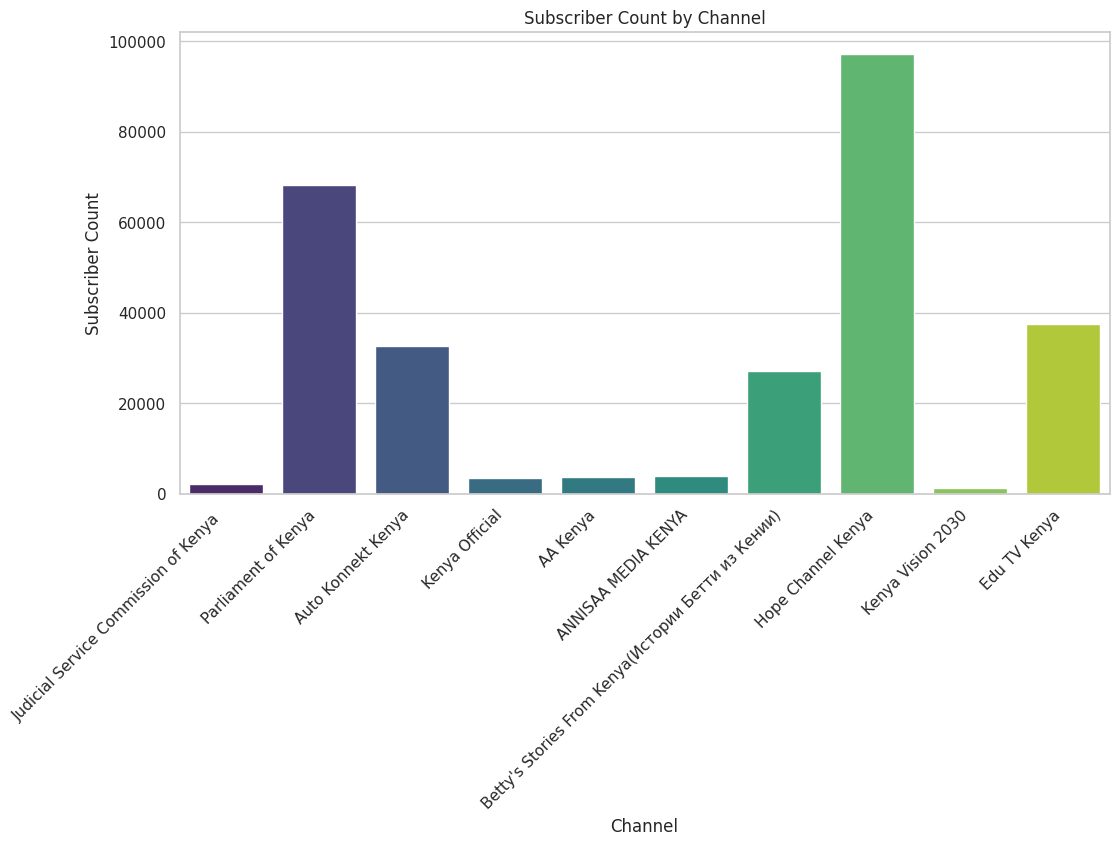

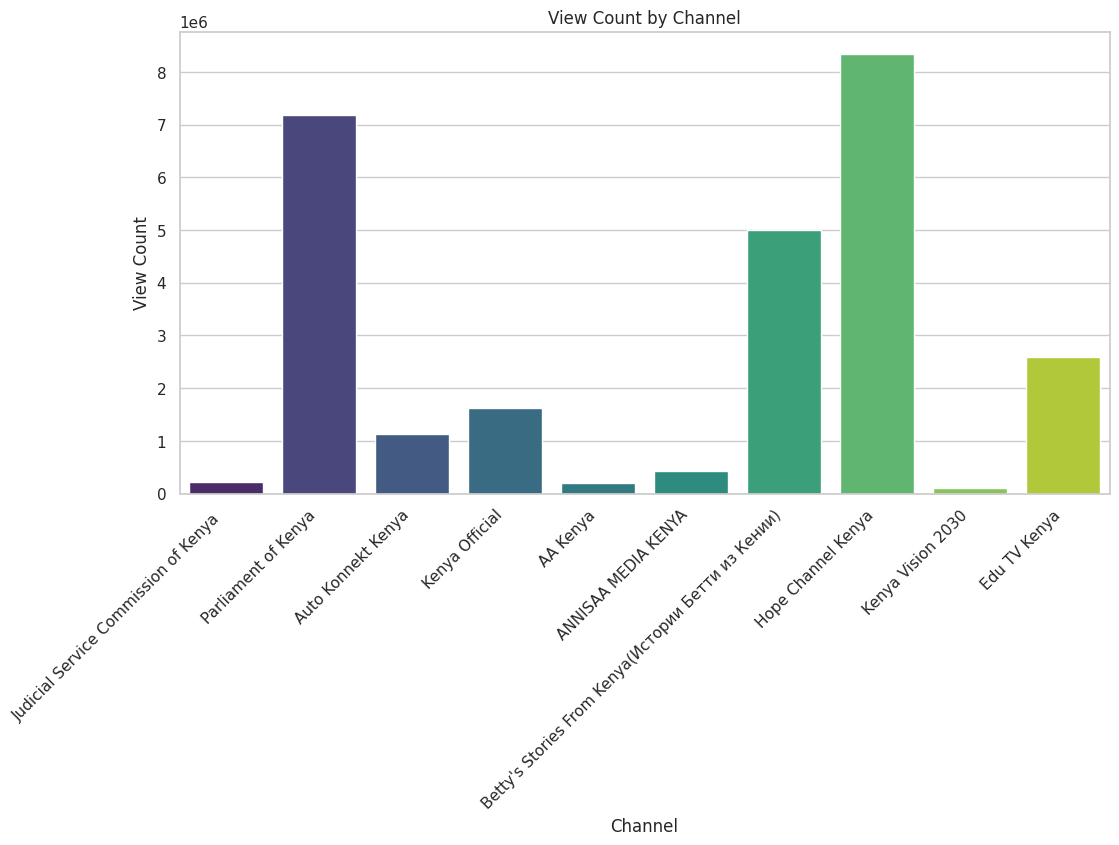

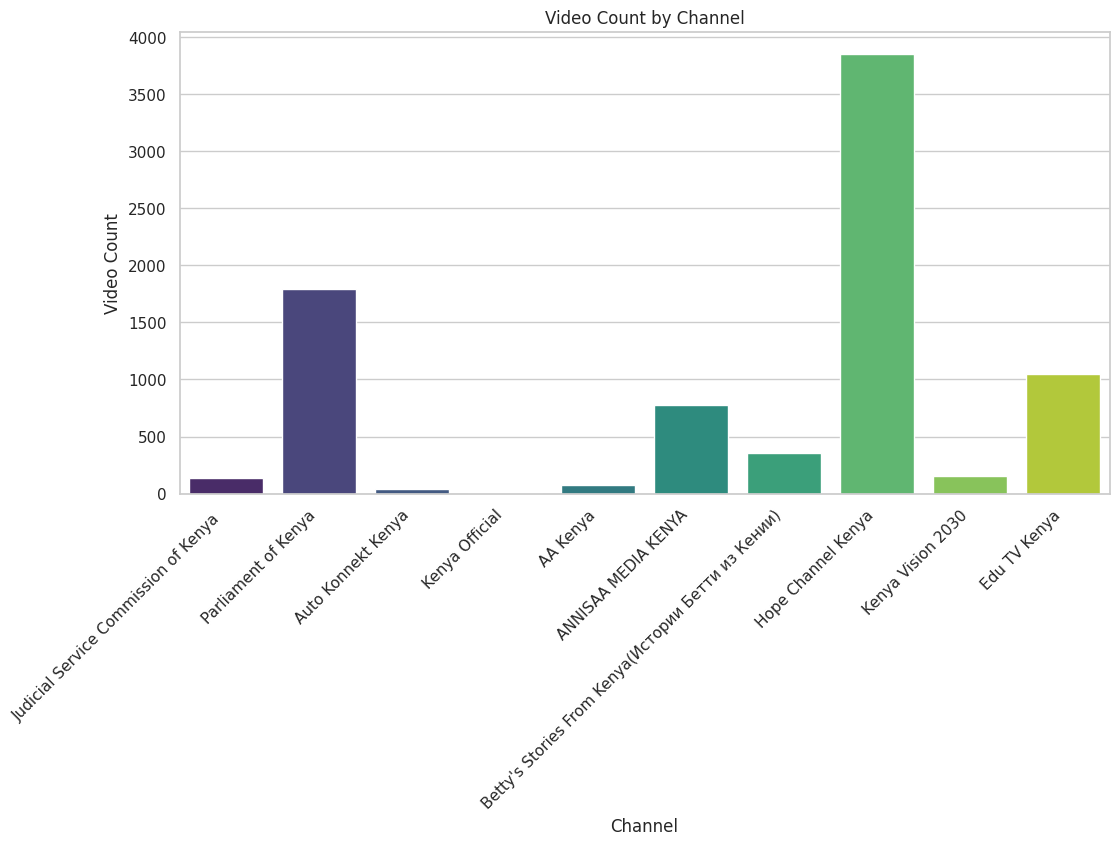

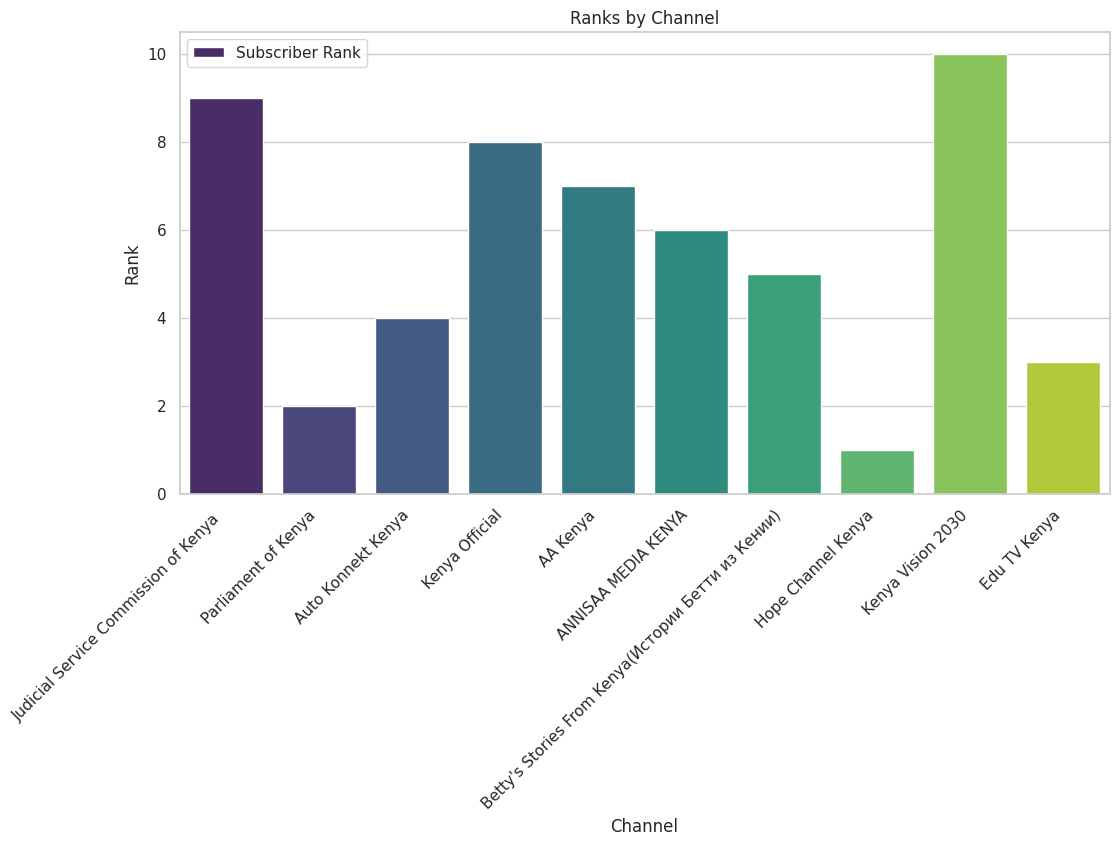

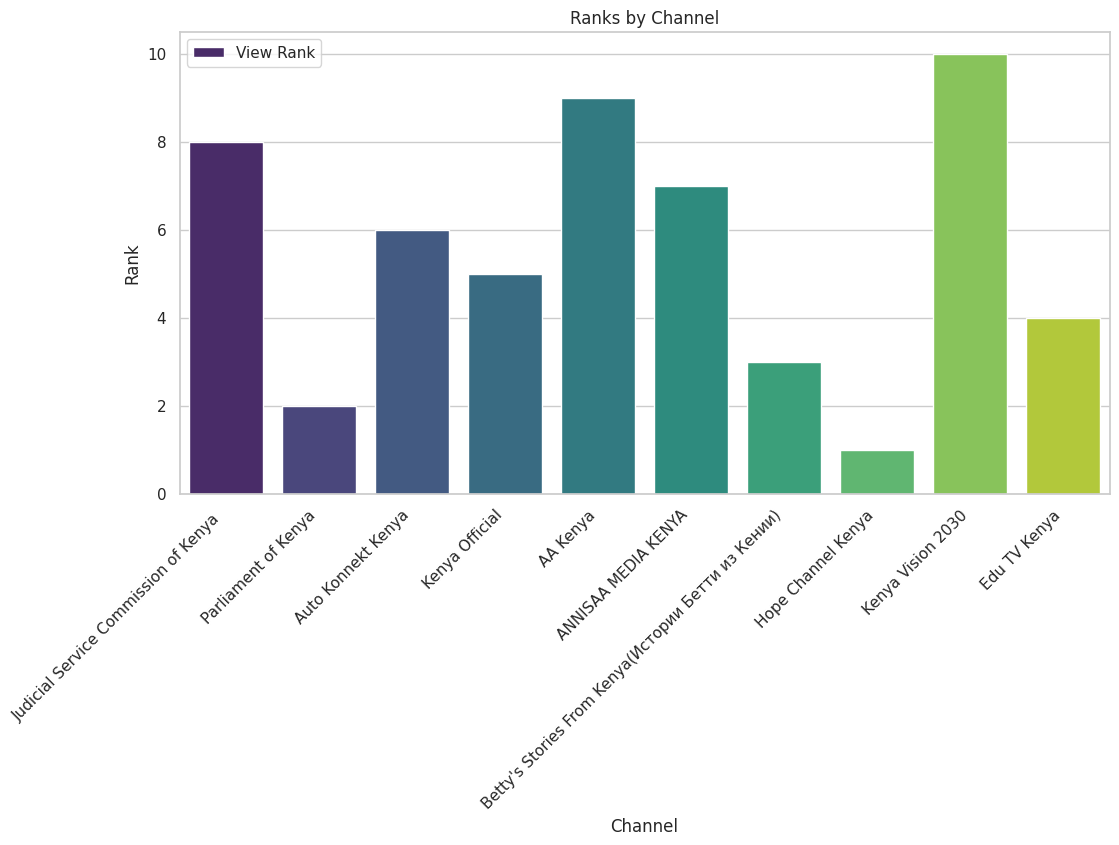

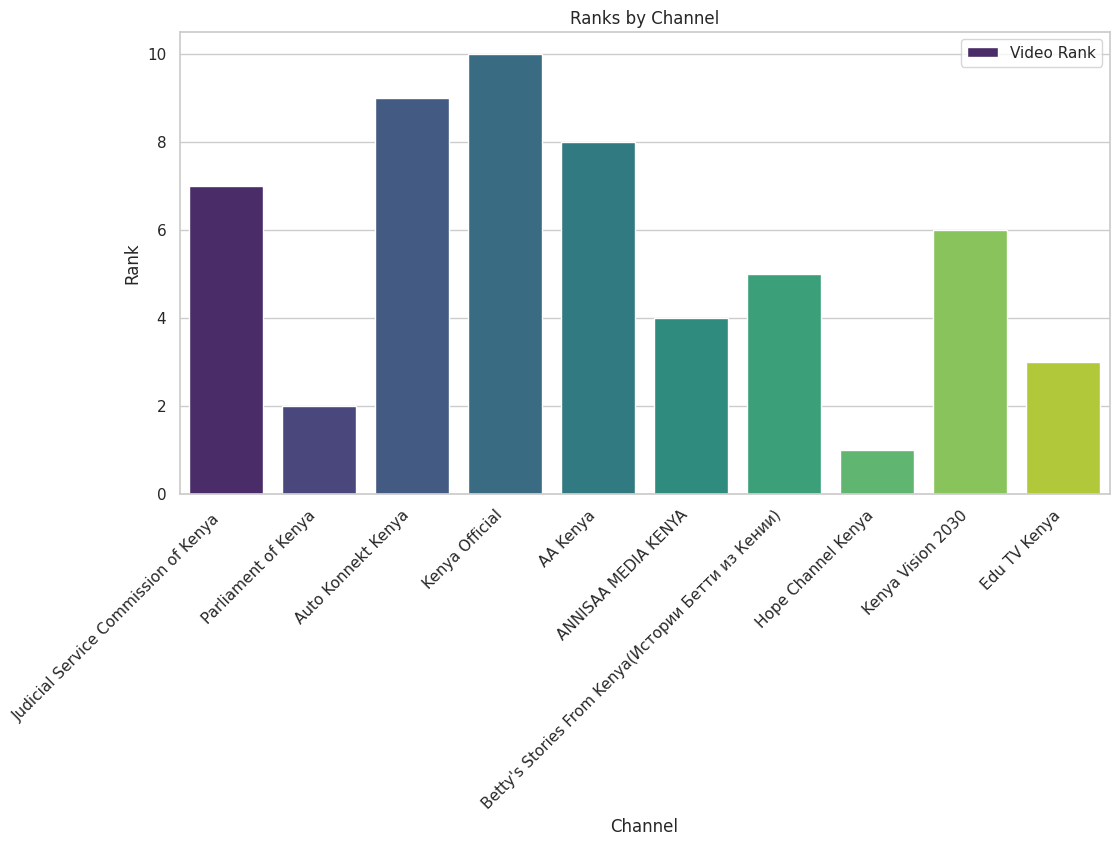

In [68]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plot subscriber count
plt.figure(figsize=(12, 6))
sns.barplot(x='title', y='subscriberCount', data=df, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Subscriber Count by Channel')
plt.xlabel('Channel')
plt.ylabel('Subscriber Count')
plt.show()

# Plot view count
plt.figure(figsize=(12, 6))
sns.barplot(x='title', y='viewCount', data=df, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('View Count by Channel')
plt.xlabel('Channel')
plt.ylabel('View Count')
plt.show()

# Plot video count
plt.figure(figsize=(12, 6))
sns.barplot(x='title', y='videoCount', data=df, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Video Count by Channel')
plt.xlabel('Channel')
plt.ylabel('Video Count')
plt.show()

# Plot ranks
plt.figure(figsize=(12, 6))

# Subscriber Rank
sns.barplot(x='title', y='subscriberRank', data=df, palette='viridis', label='Subscriber Rank')
plt.xticks(rotation=45, ha='right')
plt.title('Ranks by Channel')
plt.xlabel('Channel')
plt.ylabel('Rank')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))

# View Rank
sns.barplot(x='title', y='viewRank', data=df, palette='viridis', label='View Rank')
plt.xticks(rotation=45, ha='right')
plt.title('Ranks by Channel')
plt.xlabel('Channel')
plt.ylabel('Rank')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))

# Video Rank
sns.barplot(x='title', y='videoRank', data=df, palette='viridis', label='Video Rank')
plt.xticks(rotation=45, ha='right')
plt.title('Ranks by Channel')
plt.xlabel('Channel')
plt.ylabel('Rank')
plt.legend()
plt.show()

In [77]:
# Generate synthetic date column
start_date = '2024-08-30'  # Starting date
date_range = pd.date_range(start=start_date, periods=len(df), freq='M')
df['date'] = date_range

# Set 'date' as the index
df.set_index('date', inplace=True)

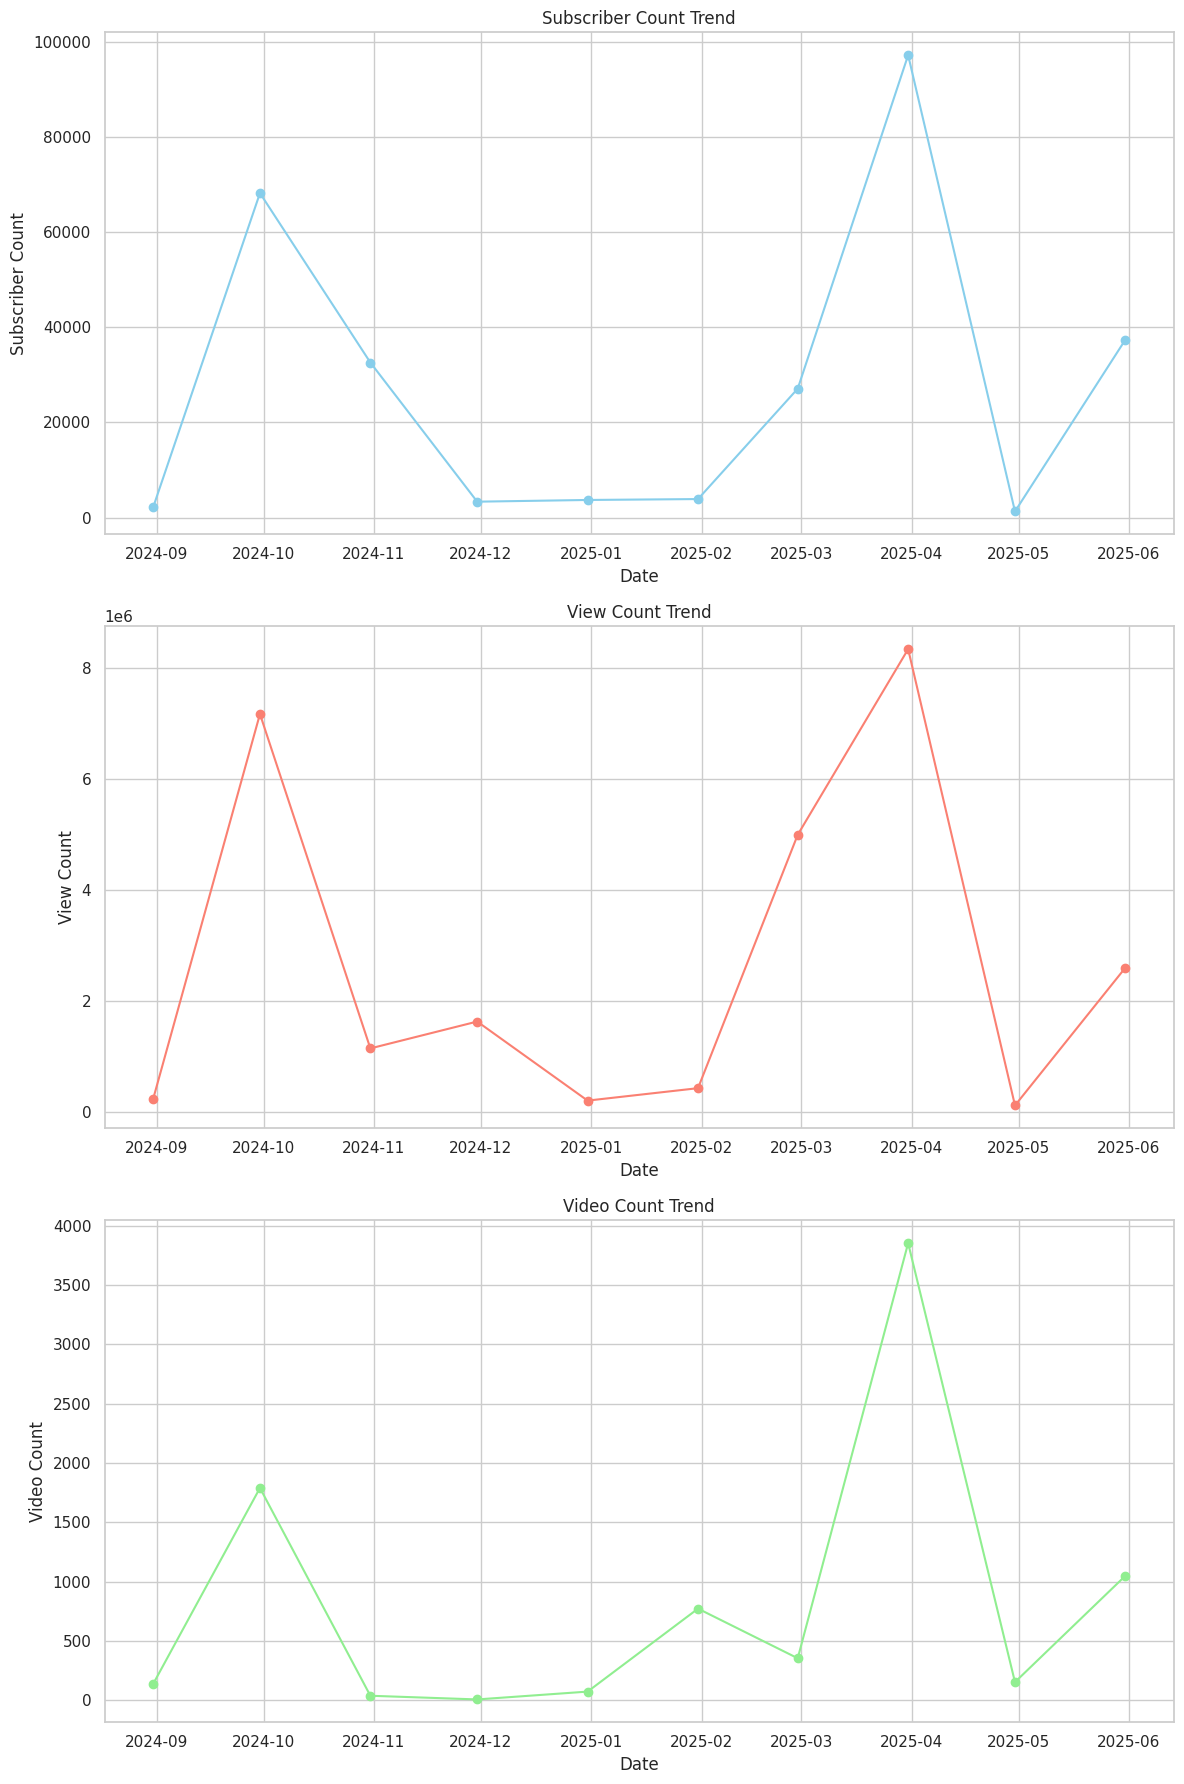

In [78]:
# Plot trends
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot subscriber count trend
axes[0].plot(df.index, df['subscriberCount'], marker='o', color='skyblue')
axes[0].set_title('Subscriber Count Trend')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Subscriber Count')
axes[0].grid(True)

# Plot view count trend
axes[1].plot(df.index, df['viewCount'], marker='o', color='salmon')
axes[1].set_title('View Count Trend')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('View Count')
axes[1].grid(True)

# Plot video count trend
axes[2].plot(df.index, df['videoCount'], marker='o', color='lightgreen')
axes[2].set_title('Video Count Trend')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Video Count')
axes[2].grid(True)

plt.tight_layout()
plt.show()